

## İrem TANRIVERDİ


In [1]:
%%html
<style>
table {float:left}
</style>

**Import the libraries you need.**  

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import warnings
warnings.filterwarnings('ignore')
import scikit_posthocs as sp
from scipy.stats import t

## Q1.   
A university professor was giving online lectures instead of face-to-face classes due to Covid-19. Later, he uploaded recorded lectures to the cloud for students who follow the course asynchronously (the students who did not attend the lesson but later watch the records). However, he believes that the students who attend class at the class time and participate in the process are more successful. Therefore, he recorded the average grades of the students at the end of the semester. The data is below.  

synchronous = [94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6]      
asynchronous = [77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2]

**Conduct the hypothesis testing to check whether the professor's belief is statistically significant by using a 0.05 significance level to evaluate the null and alternative hypotheses. Before doing hypothesis testing, check the related assumptions. Comment on the results.**

----------------

In [8]:
synchronous = {'synchronous': [94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6], } 
asynchronous = { 'asynchronous': [77.1, 71.7, 91.0 , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2] } 

synchronous = pd.DataFrame(synchronous)
asynchronous = pd.DataFrame(asynchronous)

<AxesSubplot:xlabel='synchronous'>

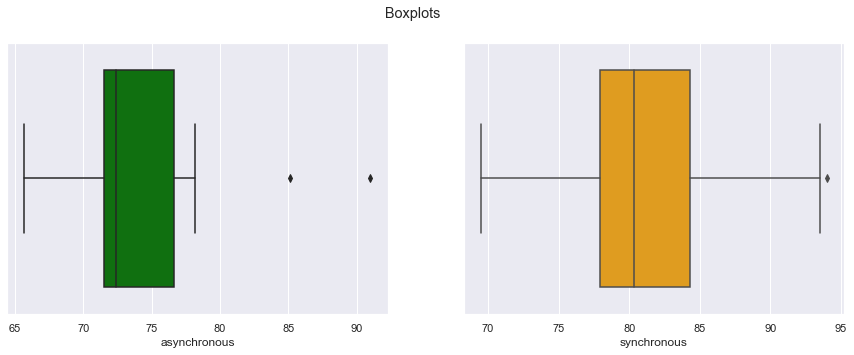

In [9]:
sns.set_theme(style="darkgrid")
fig1, axes = plt.subplots(1, 2, figsize=(15, 5))

fig1.suptitle('Boxplots')

sns.boxplot(ax=axes[0], data=asynchronous, x='asynchronous',color="green")
sns.boxplot(ax=axes[1], data=synchronous, x='synchronous', color="orange")

As seen from the boxplots, average success of the students who participated class asynchronous is approximately 72, while average success of the students who participated class synchronous is approximately 81. It seems there is difference between the mean of these two groups, but to be sure let test it with t-test.

A t-test is an analysis of two population means and it is testing the difference between the samples when the variances of two normal distributions are not known.

There are three main assumptions for independend samples t-test;
- Two samples should normally distributed.
- These two samples should independent from each other.
- The final assumption is homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.

In this questions, we know that two different procedures were applied two different groups. In these groups, studenst are different, so these two samples are independent from each other. ($2^{nd}$ assumption is satisfied)

Professor believes that the students who attend class at the class time and participate in the process are more successful. Hence, let conduct alternative hypothesis as average success of the students who paticipated class synchronous higher than students who paticipated class asynchronous.


#### Independent sample t-test will applied for this question under the null hypothesis
$H_0$: $\mu_{asynchronous}$ = $\mu_{synchronous}$

$H_1$: $\mu_{asynchronous}$ < $\mu_{synchronous}$

Firstly, let check $1^{st}$ and $3^{rd}$ assumptions are satisfied or not. 

**1. Normality of the samples**

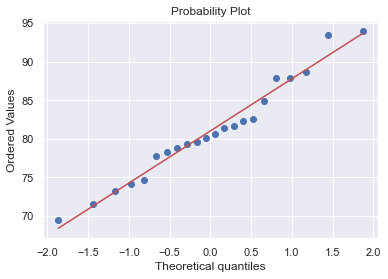

In [10]:
stats.probplot(synchronous.synchronous, dist="norm", plot=pylab)
pylab.show()

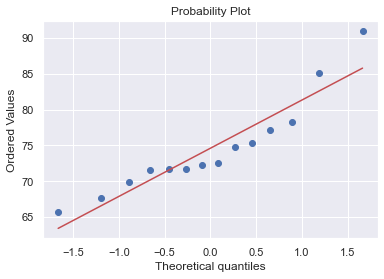

In [11]:
stats.probplot(asynchronous.asynchronous, dist="norm", plot=pylab)
pylab.show()

<AxesSubplot:xlabel='synchronous', ylabel='Density'>

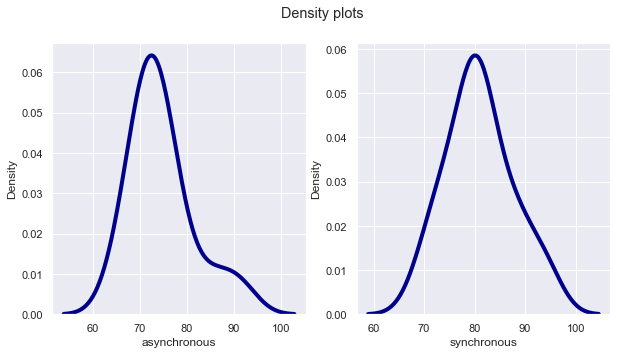

In [12]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Density plots')

sns.distplot(asynchronous.asynchronous, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0])

sns.distplot(synchronous.synchronous, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1])

As seen from both qqplot and density plot of synchronous group, it seems as mormaly distributed (it has symetric shape). To be sure, let test the normality of synchronous with "shapiro wilk normality test" under the null hypothesis that synchronous group normally distributed.

$H_0$: Sample is normally distributed

$H_1$: Sample is not normally distributed

In [13]:
# Shapiro-Wilk test for normality.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
print(stats.shapiro(synchronous))

ShapiroResult(statistic=0.9676006436347961, pvalue=0.6555852293968201)


**As seen p-value of shapiro-wilk test is bigger than the significance level of 0.05, so we fail to reject null hypothesis. That means synchronous group normally distributed.**

As seen from both qqplot and density plot of asynchronous group, it has some deviance in the right tails. This deviance may break the normality. To be sure, let test the normality of asynchronous with "shapiro wilk normality test" under the null hypothesis that asynchronous group normally distributed.

In [14]:
# Shapiro-Wilk test for normality.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
print(stats.shapiro(asynchronous))

ShapiroResult(statistic=0.8898015022277832, pvalue=0.08030205965042114)


**As seen p-value of shapiro-wilk test is bigger than the significance level of 0.05, so we fail to reject null hypothesis. That means asynchronous group normally distributed.**

$1^{st}$ assumption for the t-test also satisfied.

**2. Homogenity of the variances**:

Bartlett’s test tests the null hypothesis that all samples are from populations with equal variances. 

$H_0$: Sample variances are equal

$H_1$: Sample variances are not equal

In [15]:
stat, p = stats.bartlett(asynchronous.asynchronous, synchronous.synchronous)
p

0.9159561181526727

P-value of the bartlett test is bigger than the significance level of 0.05. This suggests that two samples' variances are equal. 

**Thus, we can use independent samples t-test now.**

In [16]:
##  this function creates a dataframe with group1 and group2, shows the first five observations of the data and descriptive stats of each group
##  please be aware that this function provides the convenience of display however it can get an error if group sizes are not equal
def group_info(group1, group2):
    data = pd.DataFrame({'group 1': group1, 'group 2': group2})
    print(data.head())
    print(data.describe()) 
group_info(asynchronous.asynchronous, synchronous.synchronous)

   group 1  group 2
0     77.1     94.0
1     71.7     84.9
2     91.0     82.6
3     72.2     69.5
4     74.8     80.1
         group 1    group 2
count  14.000000  22.000000
mean   74.600000  81.013636
std     6.710726   6.533962
min    65.700000  69.500000
25%    71.550000  77.925000
50%    72.400000  80.350000
75%    76.650000  84.325000
max    91.000000  94.000000


In [36]:
t_stat, p =stats.ttest_ind(asynchronous.asynchronous, synchronous.synchronous) 
#this test gives result for two-tailed, but we conduct hypothesis testing as left-tailed

t.cdf(t_stat, 34) #this give t-test result as left-tailed

0.0037679921704130647

P-value of the independent samples t-test is smaller than the significance level of 0.05, so we reject the null hypothesis. This suggests that two samples' means are  not equal and asynchronous group means is smaller than synchronous group. Thus, the average success of the students who participated classes as asynchronous and synchronous are different.  As seen from group informations, mean success of the students who participated classes as asynchronous is 74.6, while average success of the students who participated classes as synchronous , it is 81. Hence, we can conclude that participating classes synchronous affect positively success of the students. (it increase the success)

## Q2.

Ten students were diagnosed with diabetes by the METU Health Center in the previous semester. Healthcare personnel told these patients about the dangers of high glucose levels and prescribed a diet program. The patients came for control one month later, and their blood glucose level was reexamined. Test whether there is a difference in the glucose levels of the patients.

**According to this information, conduct the hypothesis testing to check whether there is a decrease in the cholesterol levels of the patients after the diet by using a 0.05 significance level. Before doing hypothesis testing, check the related assumptions. Comment on the results.**

test_results_before_diet= [225.83, 229.44, 208.64, 246.4 , 212.07, 221.58, 235.03, 217.55, 219.42, 220.91]   
test_results_after_diet= [196.46, 188.2 , 198.42, 209.8 , 186.96, 186.96, 210.53, 199.98, 183.9 , 197.05]


------------

In [18]:
data = {'test_results_before_diet': [225.83, 229.44, 208.64, 246.4 , 212.07, 221.58, 235.03, 217.55, 219.42, 220.91],
       'test_results_after_diet':[196.46, 188.2 , 198.42, 209.8 , 186.96, 186.96, 210.53, 199.98, 183.9 , 197.05]} 

test_results = pd.DataFrame(data)
test_results

,test_results_before_diet,test_results_after_diet
0,225.83,196.46
1,229.44,188.20
2,208.64,198.42
3,246.40,209.80
4,212.07,186.96
5,221.58,186.96
6,235.03,210.53
7,217.55,199.98
8,219.42,183.90
9,220.91,197.05


<AxesSubplot:xlabel='test_results_after_diet'>

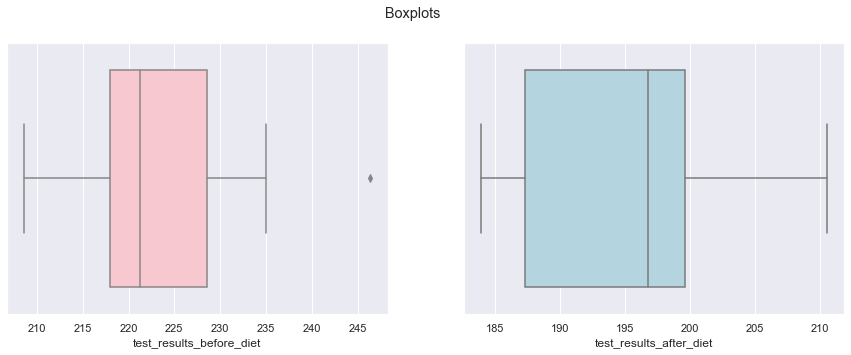

In [19]:
sns.set_theme(style="darkgrid")
fig2, axes = plt.subplots(1, 2, figsize=(15, 5))

fig2.suptitle('Boxplots')

sns.boxplot(ax=axes[0], data=test_results, x='test_results_before_diet',color="pink")
sns.boxplot(ax=axes[1], data=test_results, x='test_results_after_diet', color="lightblue")

As seen from the boxplots, average glucose level of the 10 students before diet is approximately 223, while average glucose level of the 10 students after diet is approximately 197. It seems there is difference between the mean of these two groups, but to be sure, let test it with paired-samples t-test.

The paired samples t-test is used to compare the means between two related groups of samples.
Paired t-test analysis is performed as follow:

1. Calculate the difference (d) between each pair of value
2. Compute the mean (m) and the standard deviation (s) of d
3. Compare the average difference to 0. If there is any significant difference between the two pairs of samples, then the mean of d(m) is expected to be far from 0.

**Assumptions of paired sample t-test**

- Samples should be dependent
- Sample size should be large
- Samples should be normally distributed.

In our case sample size is small, because n < 30. Since the sample size is not large enough (less than 30), we need to check whether the differences of the pairs follow a normal distribution. That means we should look for normality distance(d) when sample is smaller than 30. (distance means difference between before and after)

In [20]:
# compute the difference
d= test_results.test_results_before_diet - test_results.test_results_after_diet
d

0    29.37
1    41.24
2    10.22
3    36.60
4    25.11
5    34.62
6    24.50
7    17.57
8    35.52
9    23.86
dtype: float64

 $H_0$: Difference between before and after (d) is normally distributed
 
 $H_1$: Difference between before and after (d) is not normally distributed

In [64]:
# Shapiro-Wilk test for normality.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
print(stats.shapiro(d))

ShapiroResult(statistic=0.9610927700996399, pvalue=0.7982584238052368)


**As seen p-value of shapiro-wilk test is bigger than the significance level of 0.05, so we fail to reject null hypothesis. That means difference between before and after (d) normally distributed. Thus, we can conduct paired-sample t-test**

#### Dependent sample t-test will applied for this question under the null hypothesis
$H_0$: $\mu_{before}$ = $\mu_{after}$

$H_1$: $\mu_{before}$ $\neq$ $\mu_{after}$

In [21]:
group_info(test_results.test_results_before_diet, test_results.test_results_after_diet)

   group 1  group 2
0   225.83   196.46
1   229.44   188.20
2   208.64   198.42
3   246.40   209.80
4   212.07   186.96
          group 1     group 2
count   10.000000   10.000000
mean   223.687000  195.826000
std     11.113663    9.398358
min    208.640000  183.900000
25%    218.017500  187.270000
50%    221.245000  196.755000
75%    228.537500  199.590000
max    246.400000  210.530000


In [23]:
stats.ttest_rel(test_results.test_results_before_diet, test_results.test_results_after_diet)

Ttest_relResult(statistic=9.264318234017448, pvalue=6.733739214877261e-06)

P-value of the independent samples t-test is smaller than the significance level of 0.05, so we reject the null hypothesis.
This suggests that two samples' means are  not equal. Thus, the average glucose level of the students before diet and after diet are different. As seen from group informations, mean glucose level of the students before diet is 223.7, but after diet , it is 195.8. It can be conclude that, diet is effective for students.

## Q3.

An analyst of a financial investment company is curious about the relationship between gender and risk appetite. A random sample was taken of 660 customers from the database. The customers in the sample were classified according to their gender and their risk appetite. The result is given in the following table.


| **Gender/Risk Appetite** | Very Low | Low | Medium | High | Very High | Total |
|:--------------------:|:--------:|:---:|:------:|:----:|:---------:|:-----:|
|        **Female**        |    53    |  23 |   30   |  36  |     88    |  230  |
|         **Male**         |    71    |  48 |   51   |  57  |    203    |  430  |
|         **Total**        |    124   |  71 |   81   |  93  |    291    |  660  |

Test the hypothesis that the risk appetite of the customers in this company is independent of their gender. Use α = 0.01.    

-------

We have two categories and we have their counts. To test if these two categorical variables are independent or not, we should use **Chi-Square Independence test** under the null hypothesis:

$H_0$: Two factors are independent (there is no relationship between gender and risk appetite)

$H_1$: Two factors are not independent (there is relationship between them)


In [37]:
data = {'Very Low':[53, 71, 124],
       "Low":[23,48,71],
       "Medium":[30,51,81],
        "High":[36,57,93],
       "Very High":[88,203,291],
       "Total":[230,430,660]} 

csqr_data = pd.DataFrame(data)
csqr_data

,Very Low,Low,Medium,High,Very High,Total
0,53,23,30,36,88,230
1,71,48,51,57,203,430
2,124,71,81,93,291,660


The expected counts for each Gender-Risk combination are based on the row and column totals. We multiply the row total by the column total and then divide by the grand total (660). This gives us the expected count for each cell in the table. For example, for the Female-Very Low cell, we have:

230 x 124 /660 = 43.21 

Let calculate expected count for each cell

In [53]:
row_sum = csqr_data.Total[:2,]
exp = []
for j in range(2):
    for val in csqr_data.iloc[2,0:5]:
        exp.append(val * row_sum[j] / 660)
print(exp)

[43.21212121212121, 24.742424242424242, 28.227272727272727, 32.40909090909091, 101.4090909090909, 80.78787878787878, 46.25757575757576, 52.77272727272727, 60.59090909090909, 189.5909090909091]


In above, we see the expected count for each sell starting from **Female x Very low = 43.12**, **Female x Low = 24.74**,..., **Male x High= 60.59**, **Male x Very High= 189.59**.

In [60]:
#let also store observed values
obs= [53, 23, 30, 36, 88, 71, 48, 51, 57, 203]

chisqr= {"Observed":[53, 23, 30, 36, 88, 71, 48, 51, 57, 203],
         "Expected":[43.21212121212121, 24.742424242424242, 28.227272727272727, 32.40909090909091, 101.4090909090909, 80.78787878787878, 46.25757575757576, 52.77272727272727, 60.59090909090909, 189.5909090909091]}
chisqr = pd.DataFrame(chisqr)
chisqr

,Observed,Expected
0,53,43.212121
1,23,24.742424
2,30,28.227273
3,36,32.409091
4,88,101.409091
5,71,80.787879
6,48,46.257576
7,51,52.772727
8,57,60.590909
9,203,189.590909


**Now we can compute X²:**

# X² = sum of [(observed-expected)² / expected]

In [61]:
((chisqr.Observed - chisqr.Expected)**2/chisqr.Expected).sum()

7.094218206100441

**Then, we should find degrees of freedom for chi-square test**. One parameter we need apart from X² is the degree of freedom, which is computed as (number of categories in the first variable-1)*(number of categories in the second variable-1), and it is (2–1)*(5–1) in this case, or 4.

In [62]:
(len(row_sum)-1)*(len(csqr_data.iloc[2,0:5])-1) #degrees of freedom for X2 value

4

**Let calculate $X^2$ table value:**

$X^2_{0.990, 4}$ = 0.02

$X^2$ test result value is 7.094 and it is bigger than the $X^2$ table  value. Thus, we reject the null hypothesis. This means there is significant relationship between gender and risk appetite.

## Q4.

A researcher was curious about whether there is a difference between in terms of performance her own developed methodology C and baseline methods A and B.  Therefore, she decided to design different experiments and recorded the achieved accuracy by each method.

The below table shows the achieved accuracy on test sets by each method.  Please note that same train and test sets were used for each method


| Experiment |   A  |   B  |   C  |
|:----------:|:----:|:----:|:----:|
|     E1     | 89.8 | 90.0 | 91.5 |
|     E2     | 89.9 | 90.1 | 90.7 |
|     E3     | 88.6 | 88.8 | 90.3 |
|     E4     | 88.7 | 88.9 | 90.4 |
|     E5     | 89.6 | 89.9 | 90.2 |
|     E6     | 89.7 | 90.0 | 90.3 |
|     E7     | 89.2 | 89.0 | 90.2 |
|     E8     | 89.3 | 89.2 | 90.3 | 

**According to this information, conduct the hypothesis testing to check whether there is a difference between the performance of the methods by using a 0.05 significance level. If there is a significant difference, perform further analysis to find which one caused the difference. Before doing hypothesis testing, check the related assumptions. Comment on the results.** 

In [24]:
Experiment ={"A":[89.8,89.9,88.6,88.7,89.6,89.7,89.2,89.3],
        "B":[90.0,90.1,88.8,88.9,89.9,90.0,89.0,89.2],
        "C":[91.5,90.7,90.3,90.4,90.2,90.3,90.2,90.3]}


Experiment = pd.DataFrame(Experiment)
Experiment

,A,B,C
0,89.8,90.0,91.5
1,89.9,90.1,90.7
2,88.6,88.8,90.3
3,88.7,88.9,90.4
4,89.6,89.9,90.2
5,89.7,90.0,90.3
6,89.2,89.0,90.2
7,89.3,89.2,90.3


<AxesSubplot:xlabel='C'>

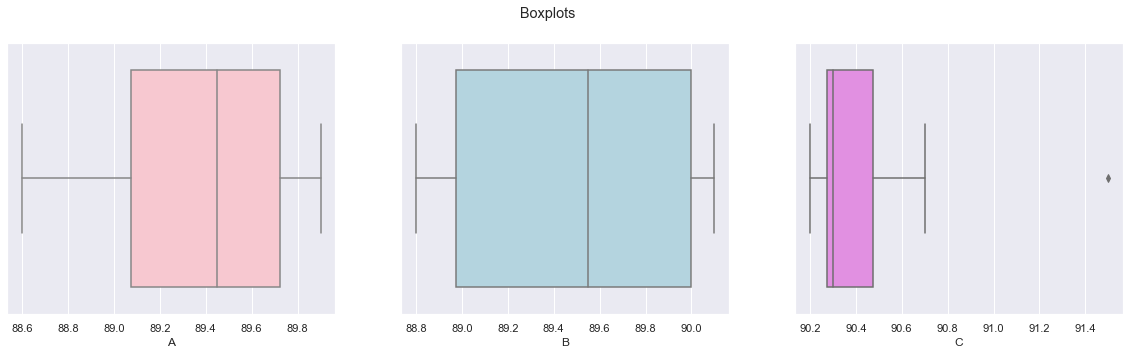

In [25]:
sns.set_theme(style="darkgrid")
fig3, axes = plt.subplots(1, 3, figsize=(20, 5))

fig3.suptitle('Boxplots')

sns.boxplot(ax=axes[0], data=Experiment, x='A',color="pink")
sns.boxplot(ax=axes[1], data=Experiment, x='B', color="lightblue")
sns.boxplot(ax=axes[2], data=Experiment, x='C', color="violet")

Three different methods applied to same sets. As seen in the boxplot, average achieved accuracy for method A and method B seems close to each other. Average achieved accuracy for method C seems higher than method A and B. To test if there is significant difference in mean achieved accuracy for these three methods we can use paired sample ANOVA because methods were applied same sets.

To use ANOVA test we should check some assumptions;
- These three samples must normally distributed
- Variance of these three group should be homogenious.

**Firsly, let check normality**

$H_0$: Samples are normally distributed

$H_1$: Samples are not normally distributed

In [26]:
# Shapiro-Wilk test for normality.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
print(stats.shapiro(Experiment.A))

ShapiroResult(statistic=0.9030325412750244, pvalue=0.3075920343399048)


- As seen p-value of shapiro-wilk test is bigger than the significance level of 0.05, so we fail to reject null hypothesis. That means method A group normally distributed.

In [27]:
# Shapiro-Wilk test for normality.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
print(stats.shapiro(Experiment.B))

ShapiroResult(statistic=0.8241004943847656, pvalue=0.05152203142642975)


- As seen p-value of shapiro-wilk test is bigger than the significance level of 0.05, so we fail to reject null hypothesis. That means method B group normally distributed.

In [28]:
# Shapiro-Wilk test for normality.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
print(stats.shapiro(Experiment.C))

ShapiroResult(statistic=0.6864951848983765, pvalue=0.0015831125201657414)


- As seen p-value of shapiro-wilk test is smaller than the significance level of 0.05, so reject null hypothesis. That means method C group is not normally distributed.

Then let check homogenity of the variances. Bartlett test is used when normality of the samples are satisfied, but in our case normality is not met for 1 sample. When normality is not met **Levene Test** is used to test homogenity of the variances.

$H_0$: Sample variances are equal

$H_1$: Sample variances are not equal

In [29]:
stat, p = stats.levene(Experiment.A, Experiment.B, Experiment.C)
p

0.19533971066521671

P-value of the levene test is bigger than the significance level of 0.05. This suggests that three samples' variances are equal.

Since normality for the one sample is not met, we cannot use ANOVA test. We should use non-parametric version of it which is **Friedman Test**.

$H_0$: Repeated measurements of the same individuals have the same distribution

$H_1$: Repeated measurements of the same individuals do not have the same distribution


In [30]:
stats.friedmanchisquare(Experiment.A, Experiment.B, Experiment.C)


FriedmanchisquareResult(statistic=13.0, pvalue=0.0015034391929775717)

As seen from Friedman test result, p-value is smaller than the significance level of 0.05, so we reject the null hyphotesis. At least one of the groups have different mean (distribution). To detect which one is different, we should apply post-hoc analysis.

$H_0$: Each pair of the means is equal.

$H_1$: Each pair of the means is not equal.

In [31]:
sp.posthoc_nemenyi_friedman(Experiment)

,A,B,C
A,1.000000,0.571463,0.001353
B,0.571463,1.000000,0.033252
C,0.001353,0.033252,1.000000


In above table we see that Friedman Post-hoc test results. It shows the p-value of each pair of comparison for differences in means. Let interpret each pair of p-value:

- For A-B methods; p-value (0.57) is bigger than the significance level of 0.05, so we fail to reject null hypothesis. It means there is not significant difference in the average achieved accuracy for method A and method B.

- For A-C methods; p-value (0.0013) is smaller than the significance level of 0.05, so we reject the null hypothesis. It means there is significant difference in the average achieved accuracy for method A and method C.

- For B-C methods; p-value (0.033) is smaller than the significance level of 0.05, so we reject the null hypothesis. It means there is significant difference in the average achieved accuracy for method B and method C.


In [32]:
def group_info(group1, group2, group3):
    data = pd.DataFrame({'group 1': group1, 'group 2': group2, 'group 3': group3})
    print(data.head())
    print(data.describe()) 
    
group_info(Experiment.A, Experiment.B, Experiment.C)

   group 1  group 2  group 3
0     89.8     90.0     91.5
1     89.9     90.1     90.7
2     88.6     88.8     90.3
3     88.7     88.9     90.4
4     89.6     89.9     90.2
         group 1    group 2    group 3
count   8.000000   8.000000   8.000000
mean   89.350000  89.487500  90.487500
std     0.492805   0.561726   0.438952
min    88.600000  88.800000  90.200000
25%    89.075000  88.975000  90.275000
50%    89.450000  89.550000  90.300000
75%    89.725000  90.000000  90.475000
max    89.900000  90.100000  91.500000


As seen from the group info, mean of the achieved accuracy for method C is higher than method A and B.

---------------------